In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("sales.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
if 'Quantity' not in df.columns:
    df['Quantity'] = 1

df.columns = df.columns.str.replace(" ", "")
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')
df.dropna(subset=['OrderDate'], inplace=True)
df['Product'] = df['ProductName']
df['Revenue'] = df['Sales']     
df['UnitPrice'] = df['Sales'] / df['Quantity']
df.drop_duplicates(inplace=True)

df.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,Region,ProductID,Category,Sub-Category,ProductName,Sales,Product,Revenue,Quantity,UnitPrice
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Bush Somerset Collection Bookcase,261.9600,1,261.9600
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,1,731.9400
2,3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Self-Adhesive Address Labels for Typewriters b...,14.6200,1,14.6200
3,4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Bretford CR4500 Series Slim Rectangular Table,957.5775,1,957.5775
4,5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Eldon Fold 'N Roll Cart System,22.3680,1,22.3680


In [8]:
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month
df['MonthYear'] = df['OrderDate'].dt.to_period('M').astype(str)

df[['OrderDate', 'MonthYear']].head()

,OrderDate,MonthYear
0,2017-08-11,2017-08
1,2017-08-11,2017-08
2,2017-12-06,2017-12
3,2016-11-10,2016-11
4,2016-11-10,2016-11


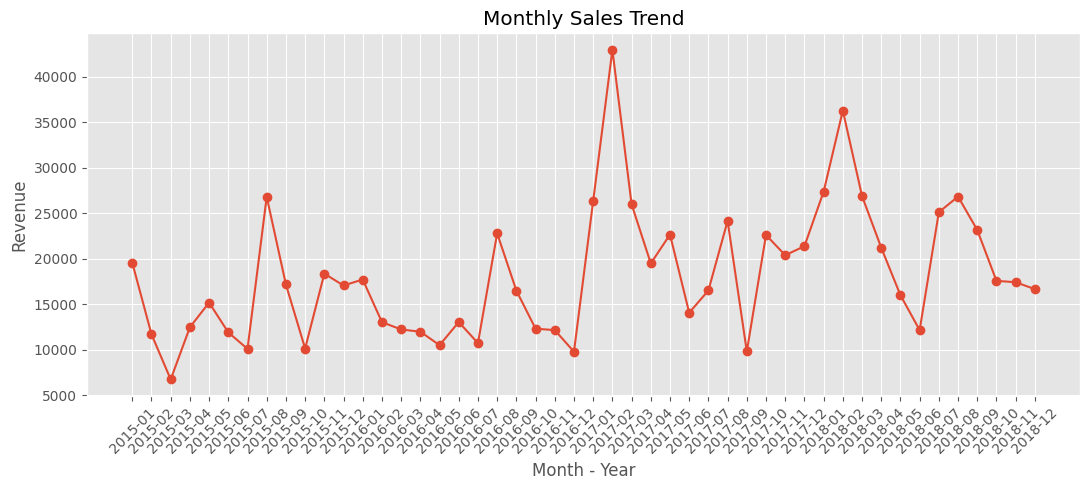

In [9]:
monthly = df.groupby("MonthYear")['Revenue'].sum().reset_index()

plt.figure(figsize=(11,5))
plt.plot(monthly['MonthYear'], monthly['Revenue'], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month - Year")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

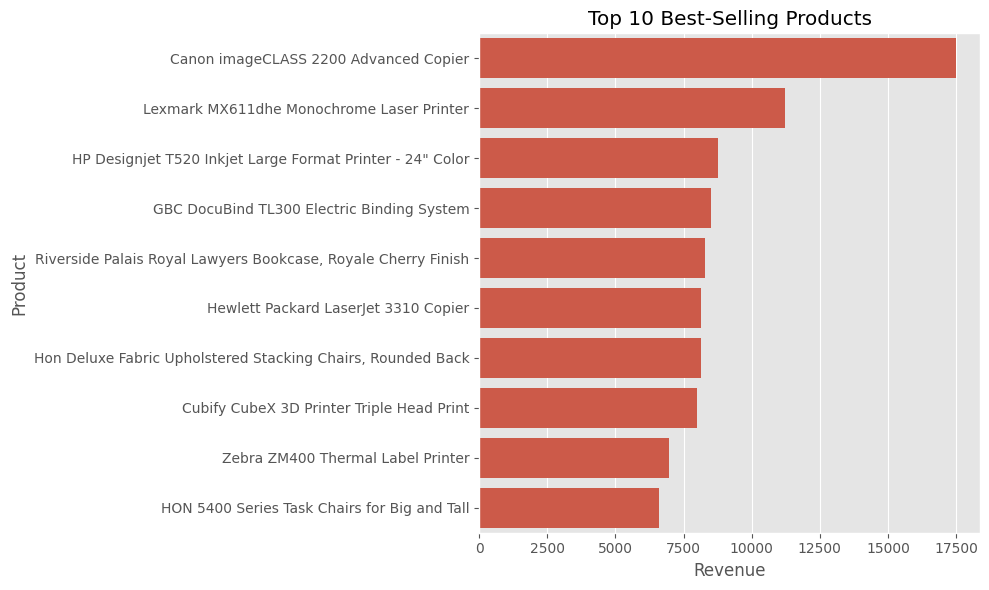

In [10]:
top_products = df.groupby("Product")['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

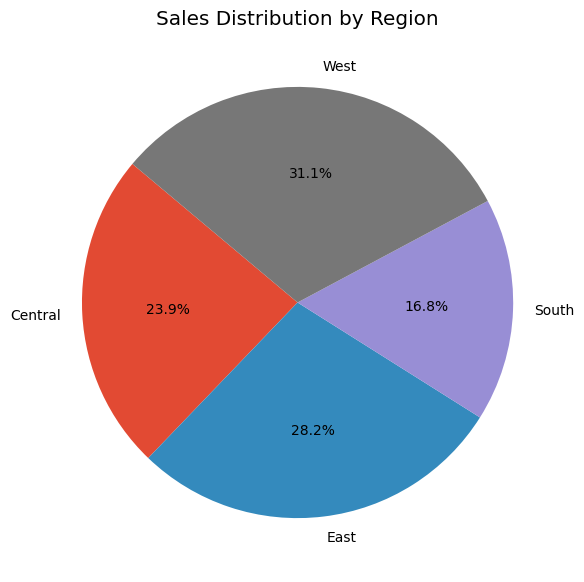

In [11]:
region_sales = df.groupby("Region")['Revenue'].sum()

plt.figure(figsize=(7,7))
plt.pie(region_sales.values, labels=region_sales.index, autopct="%1.1f%%", startangle=140)
plt.title("Sales Distribution by Region")
plt.show()

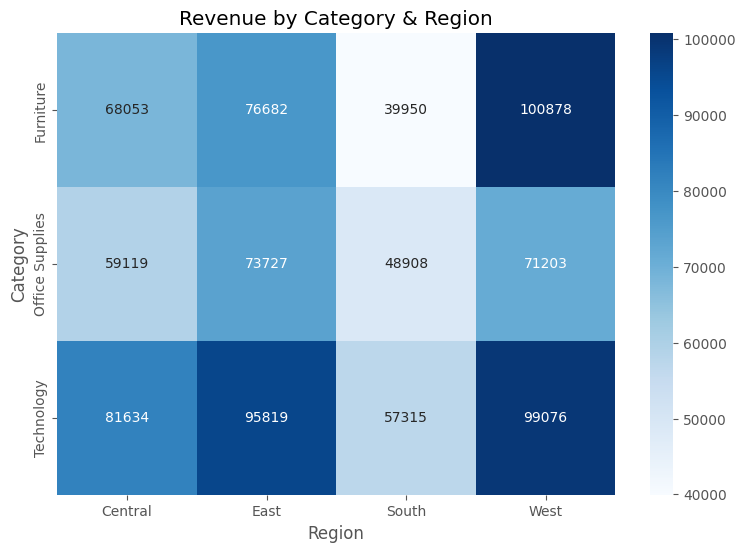

In [12]:
pivot = df.pivot_table(values='Revenue', index='Category', columns='Region', aggfunc='sum')

plt.figure(figsize=(9,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Revenue by Category & Region")
plt.show()

In [13]:
df.to_csv("cleaned_sales_dataset.csv", index=False)
print("✅ Cleaned dataset exported successfully!")

✅ Cleaned dataset exported successfully!
